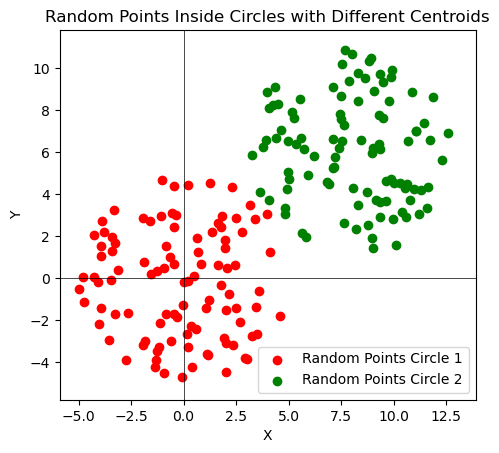

Centroid of Circle 1: (0.00, 0.00)
Centroid of Circle 2: (8.00, 6.00)


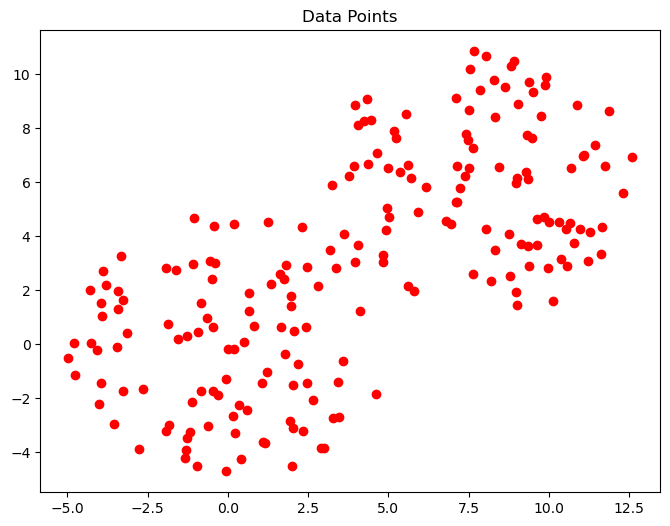

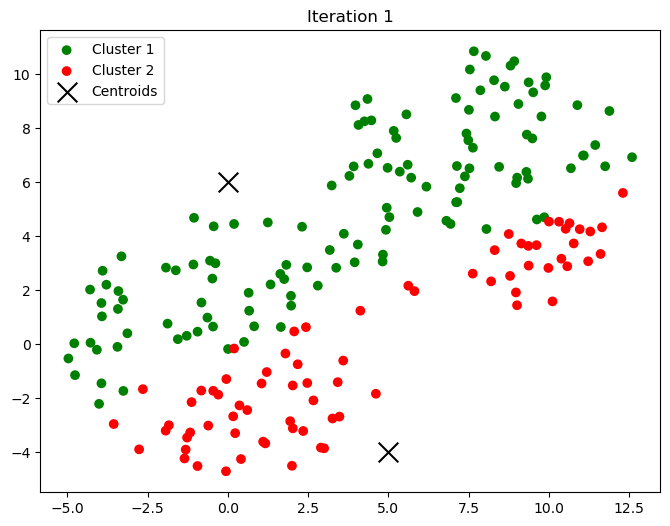

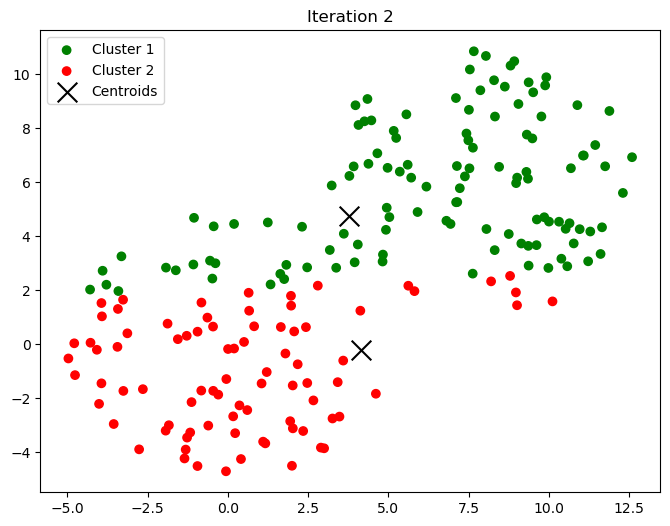

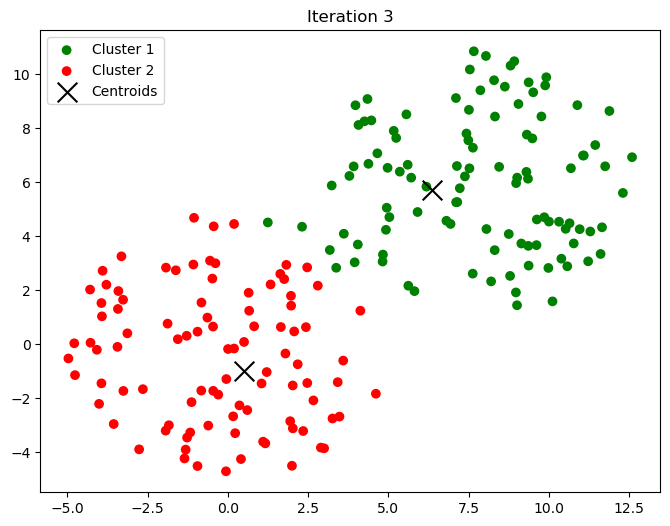

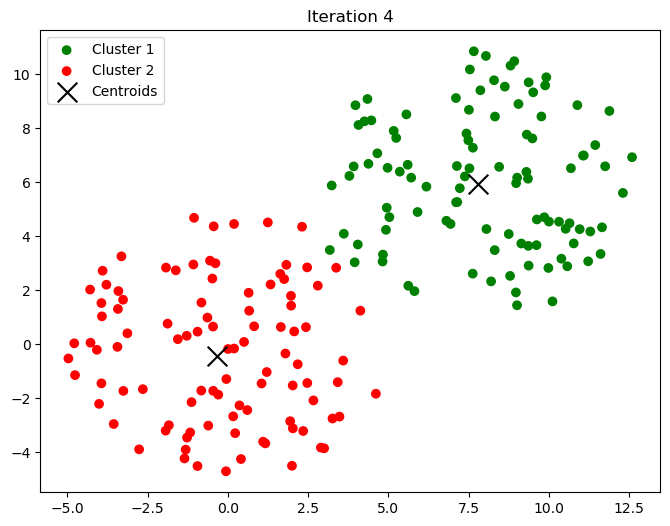

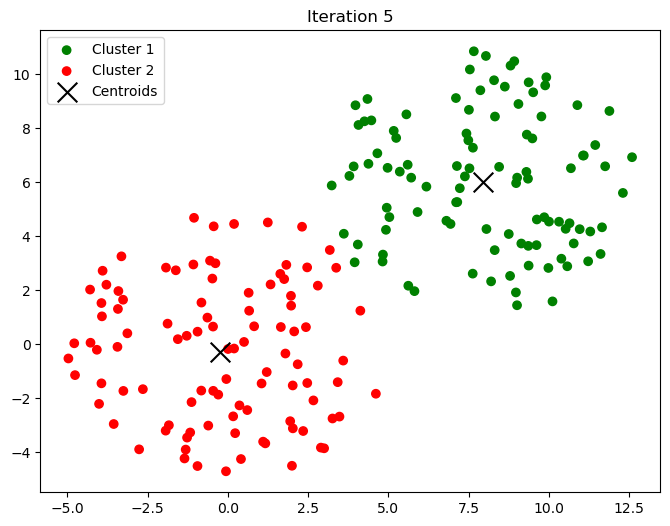

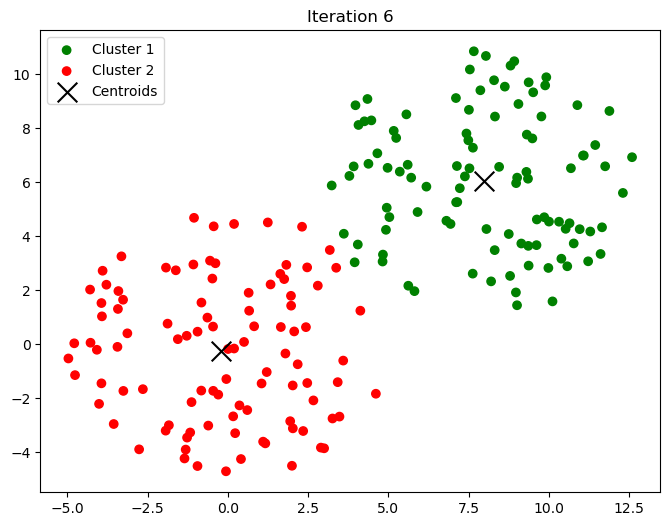

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageSequence
import pandas as pd

def generate_random_points(radius, num_points, centroid_x, centroid_y):
    r = radius * np.sqrt(np.random.rand(num_points))
    theta = np.random.rand(num_points) * 2 * np.pi
    x = r * np.cos(theta) + centroid_x
    y = r * np.sin(theta) + centroid_y
    return x, y

radius = 5
num_points = 100

centroid_x1, centroid_y1 = 0, 0
x1, y1 = generate_random_points(radius, num_points, centroid_x1, centroid_y1)

centroid_x2, centroid_y2 = 8, 6
x2, y2 = generate_random_points(radius, num_points, centroid_x2, centroid_y2)

circle1 = plt.Circle((centroid_x1, centroid_y1), radius, color='b', fill=False, linewidth=0)
circle2 = plt.Circle((centroid_x2, centroid_y2), radius, color='b', fill=False, linewidth=0)
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.scatter(x1, y1, color='r', label='Random Points Circle 1')
plt.scatter(x2, y2, color='g', label='Random Points Circle 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title('Random Points Inside Circles with Different Centroids')
plt.show()

print(f"Centroid of Circle 1: ({centroid_x1:.2f}, {centroid_y1:.2f})")
print(f"Centroid of Circle 2: ({centroid_x2:.2f}, {centroid_y2:.2f})")

X = np.column_stack((np.concatenate((x1, x2)), np.concatenate((y1, y2))))


plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], color = 'Red')
plt.title("Data Points")
plt.show()

K = 2

centroids = np.array([[0, 6], [5, -4]])

max_iters = 100
image_list = []  

for i in range(max_iters):
    distances = np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)

    plt.figure(figsize=(8, 6))
    for k in range(K):
        plt.scatter(X[labels == k, 0], X[labels == k, 1], label=f'Cluster {k + 1}', c=['red' if label == 1 else 'green' for label in labels[labels == k]])

    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='x', label='Centroids')
    plt.title(f'Iteration {i + 1}')
    plt.legend()

    img_path = f'iteration_{i + 1}.png'
    plt.savefig(img_path)
    image_list.append(img_path)

    new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])

    if np.all(centroids == new_centroids):
        break
    centroids = new_centroids

images = [Image.open(img) for img in image_list]
images[0].save(
    'Animation.gif',
    save_all=True,
    append_images=images[1:],
    duration=600,  
    loop=0  
)